In [2]:
import pandas as pd
import numpy as np

# a. Ekstraksi data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# b. Inspeksi awal
print("Ringkasan Data:")
print(df.info())

# c. Pembersihan & Konversi tipe data
# TotalCharges seringkali berisi spasi kosong yang menyebabkan error numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Menghapus baris yang kosong (null) setelah konversi
df.dropna(inplace=True)

# d. Standardisasi String
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

print("\nData setelah dibersihkan:")
print(df.head())

Ringkasan Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

C:\Users\user\AppData\Local\Temp\ipykernel_26552\2690568261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


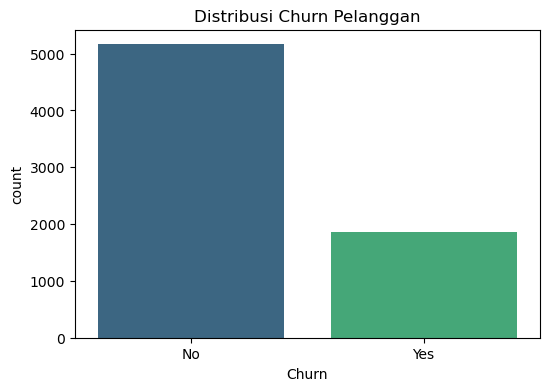

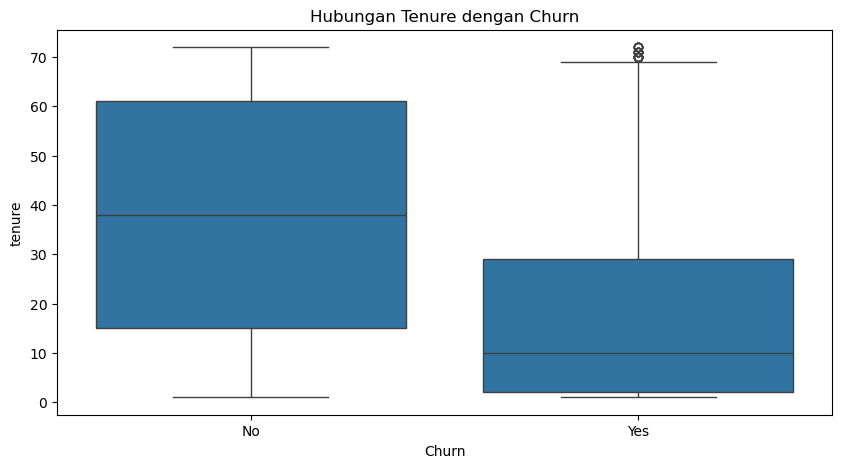

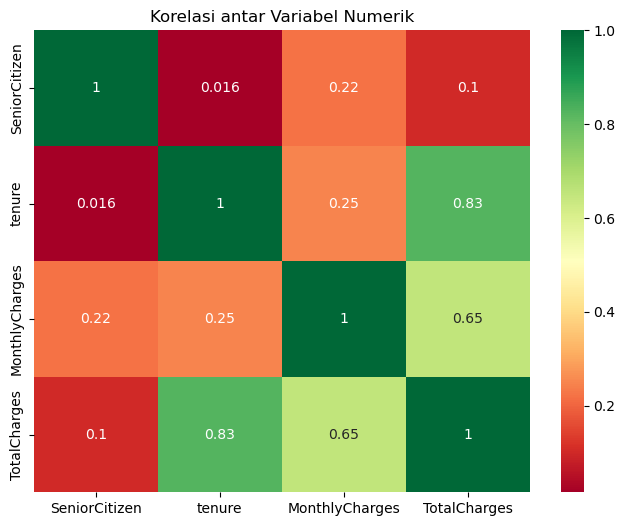

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# b. Analisis satu variabel (Univariat)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Churn Pelanggan')
plt.show()

# c. Analisis dua variabel (Bivariat: Tenure vs Churn)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Hubungan Tenure dengan Churn')
plt.show()

# d. Eksplorasi multi variabel (Korelasi Numerik)
plt.figure(figsize=(8, 6))

# Tambahkan numeric_only=True agar kolom string seperti customerID diabaikan
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('Korelasi antar Variabel Numerik')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

# d. Penyederhanaan data
X = df[['tenure']] # Variabel bebas
y = df['TotalCharges'] # Variabel terikat

# a. Implementasi
model_reg = LinearRegression()
model_reg.fit(X, y)

# b & c. Interpretasi
print(f"R-Squared Score: {model_reg.score(X, y):.4f}")
print(f"Koefisien (Slope): {model_reg.coef_[0]:.2f}")
print(f"Interpretasi: Setiap kenaikan 1 bulan tenure, TotalCharges diprediksi naik sebesar ${model_reg.coef_[0]:.2f}")

R-Squared Score: 0.6821
Koefisien (Slope): 76.27
Interpretasi: Setiap kenaikan 1 bulan tenure, TotalCharges diprediksi naik sebesar $76.27


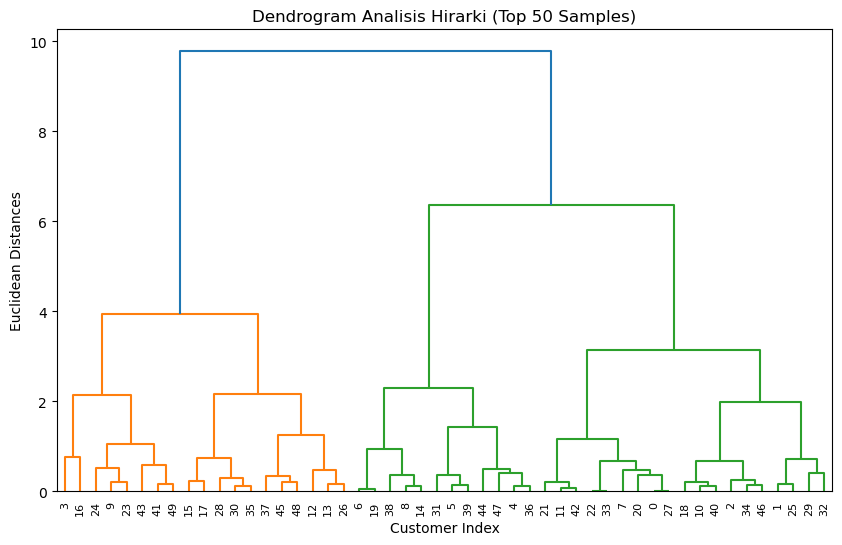

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Preprocessing: Standarisasi data numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

# b. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)

# c. Hirarki Clustering (Dendrogram)
plt.figure(figsize=(10, 6))
# Menggunakan 50 sampel saja agar visualisasi dendrogram terbaca
dendrogram = sch.dendrogram(sch.linkage(scaled_data[:50], method='ward'))
plt.title('Dendrogram Analisis Hirarki (Top 50 Samples)')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distances')
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         MonthlyCharges   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -188.198
Date:                Sun, 11 Jan 2026   AIC                            382.397
Time:                        18:28:17   BIC                            389.185
Sample:                             0   HQIC                           385.096
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2156      0.178     -1.209      0.227      -0.565       0.134
ma.L1         -0.5572      0.160     -3.476      0.001      -0.871      -0.243
sigma2        11.6392      2.501      4.653      0.0

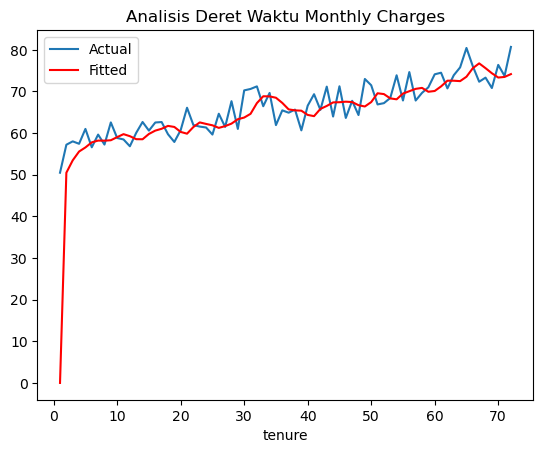

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# b. Agregasi data berdasarkan tenure (sebagai pengganti waktu)
ts_data = df.groupby('tenure')['MonthlyCharges'].mean()

# c. Pembangunan model ARIMA (p,d,q)
# Menggunakan parameter sederhana (1,1,1)
model_arima = ARIMA(ts_data, order=(1,1,1))
results = model_arima.fit()

print(results.summary())

# Plot Prediksi
ts_data.plot(label='Actual')
results.fittedvalues.plot(color='red', label='Fitted')
plt.title('Analisis Deret Waktu Monthly Charges')
plt.legend()
plt.show()

In [9]:
!pip install folium plotly


   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



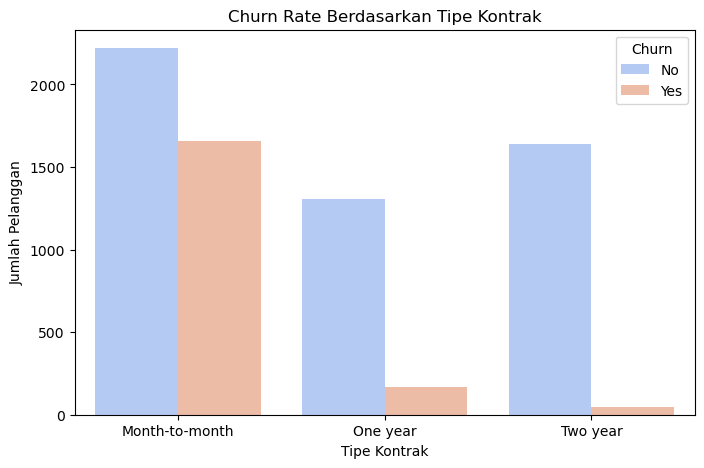

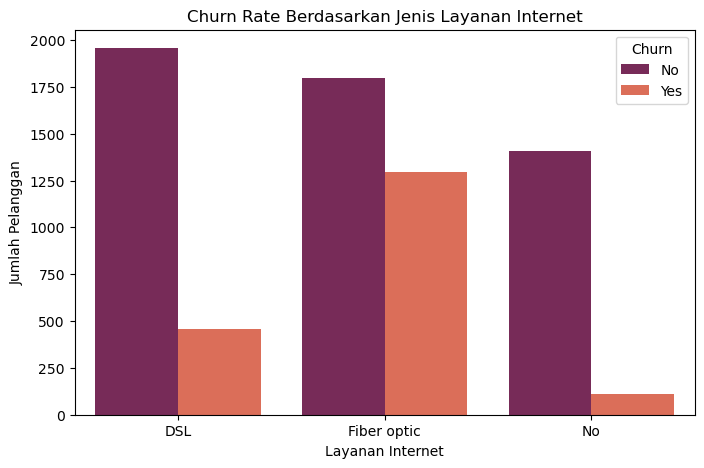

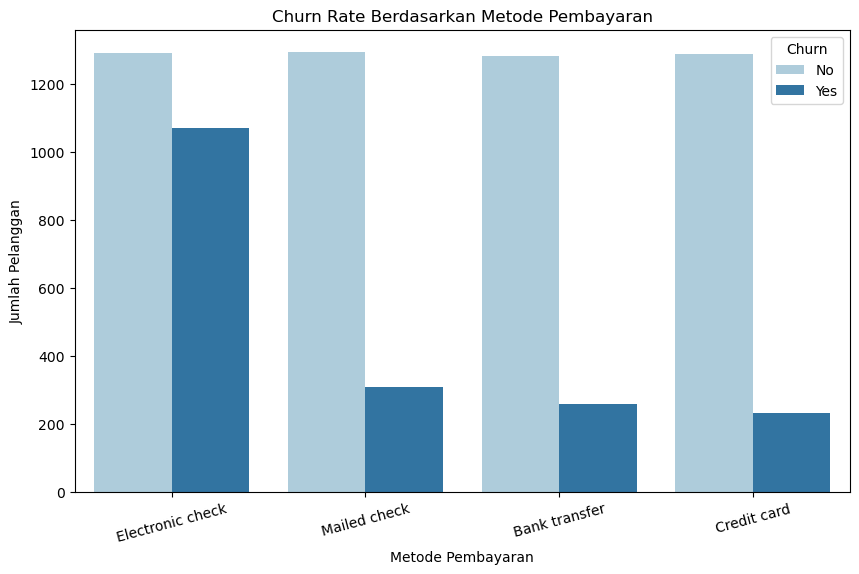

In [11]:
import plotly.express as px
import folium
import matplotlib.pyplot as plt
import seaborn as sns
# Pastikan 'df' sudah dimuat dan dibersihkan dari blok sebelumnya

# --- Visualisasi yang lebih mudah dipahami ---

# 1. Churn Rate Berdasarkan Tipe Kontrak (Sangat Penting untuk Bisnis)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn Rate Berdasarkan Tipe Kontrak')
plt.xlabel('Tipe Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.show()
# Interpretasi: Pelanggan dengan kontrak Month-to-month memiliki churn rate tertinggi.

# 2. Churn Rate Berdasarkan Jenis Layanan Internet
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='rocket')
plt.title('Churn Rate Berdasarkan Jenis Layanan Internet')
plt.xlabel('Layanan Internet')
plt.ylabel('Jumlah Pelanggan')
plt.show()
# Interpretasi: Pelanggan Fiber optic seringkali memiliki churn rate lebih tinggi.

# 3. Churn Rate Berdasarkan Metode Pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Paired')
plt.title('Churn Rate Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=15) # Rotasi label agar tidak tumpang tindih
plt.show()
# Interpretasi: Metode pembayaran "Electronic check" sering dikaitkan dengan churn tinggi.

# --- Tetap sertakan Grafik Interaktif Plotly untuk detail ---
# d. Grafik Interaktif dengan Plotly
fig = px.scatter(df, x="tenure", y="MonthlyCharges", color="Churn",
                 size='MonthlyCharges', hover_data=['customerID', 'Contract', 'InternetService'],
                 title="Interaktif: Hubungan Tenure, Biaya Bulanan & Churn (Hover untuk detail)")
fig.show()

# --- Peta Geografis (Opsional, jika ingin tetap ada) ---
# c. Pemetaan geografis sederhana (Folium)
map_center = [-6.2000, 106.8166] # Contoh koordinat Jakarta
m = folium.Map(location=map_center, zoom_start=12)
folium.Marker(map_center, popup='Pusat Layanan Pelanggan').add_to(m)
# m # Tampilkan peta di notebook (hapus # jika ingin melihat)